In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
     #   print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
df1 = pd.read_csv("2018-19_AutonomousVehicleDisengagementReports(firsttimefilers).csv")
df2 = pd.read_csv("2019AutonomousVehicleDisengagementReports.csv")

#Combining Both DataFrames
res = [df1, df2] 
df = pd.concat(res)

#Renaming Columns for Legibility 
df.columns = ['Manufacturer', 'Permit Number', 'Date', 'VIN number','Vehicle Is Capable Of Operating Without A Driver','Driver Present','Disengagement Initiated By','Disengagement Location', 'Description Of Facts Causing Disengagement', 'N/A','N/A'] 
df.head(20)

#Cleaning up dataframe to get rid of string issues such as "Test Driver" vs "test driver", etc. 
df["Disengagement Location"] = df["Disengagement Location"].replace("street (high speed)", "street")
df["Disengagement Location"] = df["Disengagement Location"].replace("Street", "street") 
df["Disengagement Location"] = df["Disengagement Location"].replace("STREET", "street") 
df["Disengagement Location"] = df["Disengagement Location"].replace("Highway", "highway")
df["Disengagement Location"] = df["Disengagement Location"].replace("Freeway", "freeway")
df["Disengagement Location"] = df["Disengagement Location"].replace("Downtown street", "street") 
df["Disengagement Location"] = df["Disengagement Location"].replace("Rural", "rural road") 
df["Disengagement Location"] = df["Disengagement Location"].replace("Parking Facility, parking facility")
df["Disengagement Location"] = df["Disengagement Location"].replace("Parking Lot", "parking facility") 
df["Disengagement Location"] = df["Disengagement Location"].replace("Interstate", "interstate") 
df["Disengagement Location"] = df["Disengagement Location"].str.lower()
df["Disengagement Location"] = df["Disengagement Location"].replace("downtown street", "street") 

df["Driver Present"] = df["Driver Present"].str.lower()

df["Vehicle Is Capable Of Operating Without A Driver"] = df["Vehicle Is Capable Of Operating Without A Driver"].str.lower()

df["Disengagement Initiated By"] = df["Disengagement Initiated By"].replace("Test Driver", "test driver")
df["Disengagement Initiated By"] = df["Disengagement Initiated By"].replace("Safety Driver", "test driver")
df["Disengagement Initiated By"] = df["Disengagement Initiated By"].replace("Vehicle Operator", "test driver")
df["Disengagement Initiated By"] = df["Disengagement Initiated By"].replace("test driver", "test driver") 
df["Disengagement Initiated By"] = df["Disengagement Initiated By"].str.lower()

df["Date"] = df["Date"].replace("1/30.2019", "1/30/2019")
df["Date"] = pd.to_datetime(df["Date"]) 
df = df.set_index("Date") 



df.head(20)




,Manufacturer,Permit Number,VIN number,Vehicle Is Capable Of Operating Without A Driver,Driver Present,Disengagement Initiated By,Disengagement Location,Description Of Facts Causing Disengagement,N/A,N/A
Date,,,,,,,,,,
2018-03-14,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN
2018-03-14,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the radar based percept...,NaN,NaN
2018-03-14,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN
2018-03-14,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN
2018-03-15,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN
2018-03-15,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the radar based percept...,NaN,NaN
2018-03-16,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN
2018-03-16,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the GPS system in the g...,NaN,NaN
2018-03-16,Ambarella Corp.,AVT053,3LN6L5MU7HR609845,no,yes,test driver,street,Unexpected result from the path planner in the...,NaN,NaN


Count Statistics

In [3]:
#Number of each stats: 

print("Number of reports: " + str(df.shape[0]))
print("Number of unique manufacturers: " + str(df["Manufacturer"].nunique()))
print("Number of unique vehicles: " + str(df["VIN number"].nunique()))
print("Number of unique permits: " + str(df["Permit Number"].nunique()))


Number of reports: 9339
Number of unique manufacturers: 36
Number of unique vehicles: 304
Number of unique permits: 35


Disengagement Initiated By 

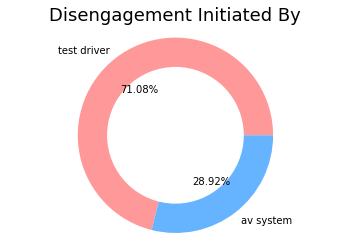

In [4]:
#Disengagement Initiated By 
catinitiate = df['Disengagement Initiated By'].unique().tolist()
catinitiate.pop()
plt.title('Disengagement Initiated By', fontsize = 18)
vcountinitiate = df['Disengagement Initiated By'].value_counts().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(vcountinitiate, labels= catinitiate, autopct = '%0.2f%%', colors= colors)
plt.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()




Disengagement Location 

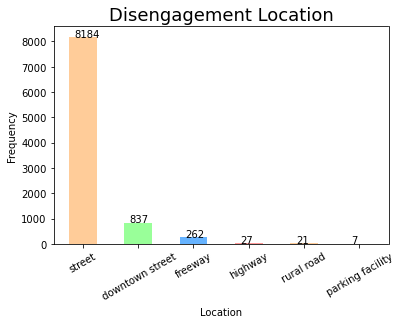

In [5]:
#Disengagement Location (bar graph instead of pie as more legible)
catlocation = df['Disengagement Location'].unique().tolist()
catlocation.pop(-1)
colors1 = ['#ffcc99', '#99ff99','#66b3ff', '#ff9999',]
catloc = range(len(catlocation))
plt.title('Disengagement Location', fontsize = 18)
plt.xlabel("Location")
plt.ylabel("Frequency")
vcountlocation = df['Disengagement Location'].value_counts().tolist()
plt.bar(catloc, vcountlocation,width = 0.5, color = colors1)
ax = plt.subplot()
ax.set_xticks(catloc)
ax.set_xticklabels(catlocation, rotation = 30)
for i, v in enumerate(vcountlocation):
    ax.text(i-.15, v, str(v), color='black')
plt.show()


#ISSUE: Not able to data filter the downtown street to combine with street for some reason, need help with that. 
                     